In [ ]:
from shapely.geometry import Point, Polygon
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
import os
# Загружаем необходимые библиотеки

<Axes: >

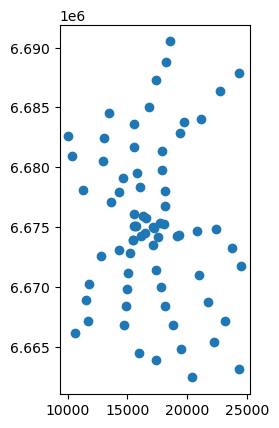

In [ ]:
stations = gpd.read_file("stations.gpkg").to_crs(epsg="32637")
stations.plot()

In [17]:
stations

,station,line,time,depth,img,lat,lon,district,geometry
0,Девяткино,Кировско-Выборгская линия,39,0,subway markers/Кировско-Выборгская линия.png,30.442222,60.050278,Всеволожский район Ленинградской области,POINT (24284.416 6687879.319)
1,Гражданский проспект,Кировско-Выборгская линия,35,64,subway markers/Кировско-Выборгская линия.png,30.418056,60.035000,Калининский район,POINT (22724.908 6686362.255)
2,Академическая,Кировско-Выборгская линия,32,64,subway markers/Кировско-Выборгская линия.png,30.395833,60.012500,Калининский район,POINT (21167.185 6684031.917)
3,Политехническая,Кировско-Выборгская линия,29,65,subway markers/Кировско-Выборгская линия.png,30.370833,60.008611,Калининский район,POINT (19724.624 6683783.205)
4,Площадь Мужества,Кировско-Выборгская линия,27,67,subway markers/Кировско-Выборгская линия.png,30.366667,59.999722,Калининский район,POINT (19364.180 6682829.310)
...,...,...,...,...,...,...,...,...,...
67,Бухарестская,Фрунзенско-Приморская линия,20,65,subway markers/Фрунзенско-Приморская линия.png,30.368611,59.883889,Фрунзенский район,POINT (17786.839 6669988.719)
68,Международная,Фрунзенско-Приморская линия,22,65,subway markers/Фрунзенско-Приморская линия.png,30.378889,59.870278,Фрунзенский район,POINT (18161.196 6668406.436)
69,Проспект Славы,Фрунзенско-Приморская линия,24,59,subway markers/Фрунзенско-Приморская линия.png,30.394722,59.856944,Фрунзенский район,POINT (18849.547 6666814.446)
70,Дунайская,Фрунзенско-Приморская линия,27,17,subway markers/Фрунзенско-Приморская линия.png,30.411111,59.839722,Фрунзенский район,POINT (19513.373 6664787.905)


In [ ]:
def get_isochrone(station_name, lon, lat, walk_time=10, speed=4.5):
    '''  
    Данная функция строит изохрону от станции метро на заданное количество минут.    
    '''
    # ПРИМЕЧАНИЕ: Код был взят со StackOverflow (с авторскими модификациями)
    # ССЫЛКА: https://stackoverflow.com/questions/62789846/isochrones-with-osmnx
    G = ox.graph_from_point((lon, lat), simplify=True, network_type='walk')
    gdf_nodes = ox.graph_to_gdfs(G, edges=False)
    x, y = gdf_nodes['geometry'].unary_union.centroid.xy
    center_node = ox.nearest_nodes(G, Y = y[0], X= x[0])
    walking_meters = walk_time * speed * 1000 / 60 #km per hour to m per minute times the minutes to walk
    subgraph = nx.ego_graph(G, center_node, radius=walking_meters, distance='length')
    node_points = [Point(data['x'], data['y']) for node, data in subgraph.nodes(data=True)]
    polys = gpd.GeoDataFrame(geometry=node_points).unary_union.convex_hull
    coords = [*polys.exterior.coords]
    polys_gdf = gpd.GeoDataFrame(
        {"name":[station_name],
        "walk_time":[walk_time]},
        geometry=[Polygon(coords)]
    )
    polys_gdf.crs="EPSG:4326"
    return polys_gdf.to_crs(epsg=4326)

def concatenate_gdf_from_list(list_):
    base_gdf = list_[0]
    for gdf in list_[1:]:
        base_gdf = pd.concat([base_gdf, gdf], axis=0)
    return base_gdf


In [ ]:
minutes = [5, 10, 15, 20]

five_minutes_iso = []
ten_minutes_iso = []
fifteen_minutes_iso = []
twenty_minutes_iso = []

isos = []

# Строим изохроны на 5, 10, 15, 20 минут
# ПРИМЕЧАНИЕ: в дальнейшем задействованы были только последние (20-минутные)
for i, station in stations.iterrows():
    five_minutes_iso.append(get_isochrone(station["station"], station["lon"], station["lat"], walk_time=5))
    ten_minutes_iso.append(get_isochrone(station["station"], station["lon"], station["lat"], walk_time=10))
    fifteen_minutes_iso.append(get_isochrone(station["station"], station["lon"], station["lat"], walk_time=15))
    twenty_minutes_iso.append(get_isochrone(station["station"], station["lon"], station["lat"], walk_time=20))

c:\Users\user\miniconda3\envs\ox\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
c:\Users\user\miniconda3\envs\ox\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
c:\Users\user\miniconda3\envs\ox\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
c:\Users\user\miniconda3\envs\ox\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
c:\Users\user\miniconda3\envs\ox\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates 

In [ ]:
# Записываем результаты в переменные
five_minutes_iso = concatenate_gdf_from_list(five_minutes_iso)
ten_minutes_iso = concatenate_gdf_from_list(ten_minutes_iso)
fifteen_minutes_iso = concatenate_gdf_from_list(fifteen_minutes_iso)
twenty_minutes_iso = concatenate_gdf_from_list(twenty_minutes_iso)

NameError: name 'concatenate_gdf_from_list' is not defined

In [ ]:
# Сохраняем результаты
if not os.path.exists(f"isochrones_geopackages"):
                os.makedirs(f"isochrones_geopackages")
five_minutes_iso.to_file("isochrones_geopackages/five_minutes_iso.gpkg")
ten_minutes_iso.to_file("isochrones_geopackages/ten_minutes_iso.gpkg")
fifteen_minutes_iso.to_file("isochrones_geopackages/fifteen_minutes_iso.gpkg")
twenty_minutes_iso.to_file("isochrones_geopackages/twenty_minutes_iso.gpkg")

NameError: name 'os' is not defined